# Example climb: Pearson & Spearman correlation coefficients

In [1]:
import sys

import numpy as np
import pandas as pd

sys.path.append('..')

from hill_climber import HillClimber

## 1. Objective function

In [2]:
def objective_spearman_large_pearson_small(x, y):
    '''Maximize Spearman correlation while minimizing Pearson correlation.
    
    Objective function: |Spearman| - |Pearson|
    
    This encourages:
        - Small Pearson correlation (close to 0)
        - Large Spearman correlation (close to +/-1)
    
    Useful for finding non-linear monotonic relationships.
    
    Args:
        x: First variable (array-like)
        y: Second variable (array-like)
    
    Returns:
        Tuple of (metrics_dict, objective_value) where:
            - metrics_dict: Dict with 'Pearson coefficient' and 'Spearman coefficient'
            - objective_value: |Spearman| - |Pearson|
    '''
    pearson_corr = pd.Series(x).corr(pd.Series(y), method='pearson')
    spearman_corr = pd.Series(x).corr(pd.Series(y), method='spearman')
    objective = abs(spearman_corr) - abs(pearson_corr)
    
    metrics = {
        'Pearson coefficient': pearson_corr,
        'Spearman coefficient': spearman_corr
    }
    
    return metrics, objective

## 2. Input distributions

In [3]:
# Create input distribution
n = 100

data = pd.DataFrame({
    'x': np.random.rand(n),
    'y': np.random.rand(n)
})

## 3. Run parameters

In [ ]:
# Set hyperparameters
max_time = 6 * 60
step_size = 1.0
replicates = 10
temperature = 100.0
initial_noise = 0.5
cooling_rate = 0.99999
objective_func = objective_spearman_large_pearson_small

## 4. Hill climbing run

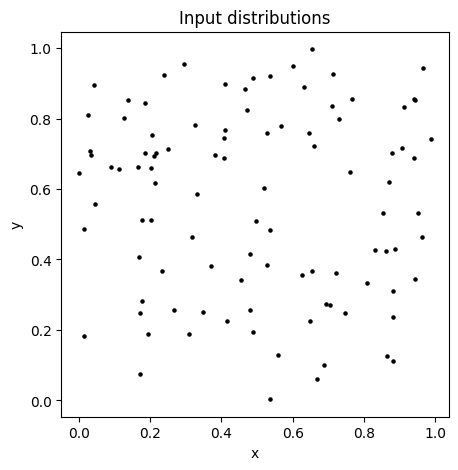

In [10]:
# Create HillClimber instance
climber = HillClimber(
    data=data,
    objective_func=objective_func,
    max_time=max_time,
    step_size=step_size,
    temperature=temperature,
    cooling_rate=cooling_rate,
    mode='maximize'
)

# Plot the input data
climber.plot_input()

# Run parallel optimization
results = climber.climb_parallel(
    replicates=replicates,
    initial_noise=initial_noise
)

## 5. Results

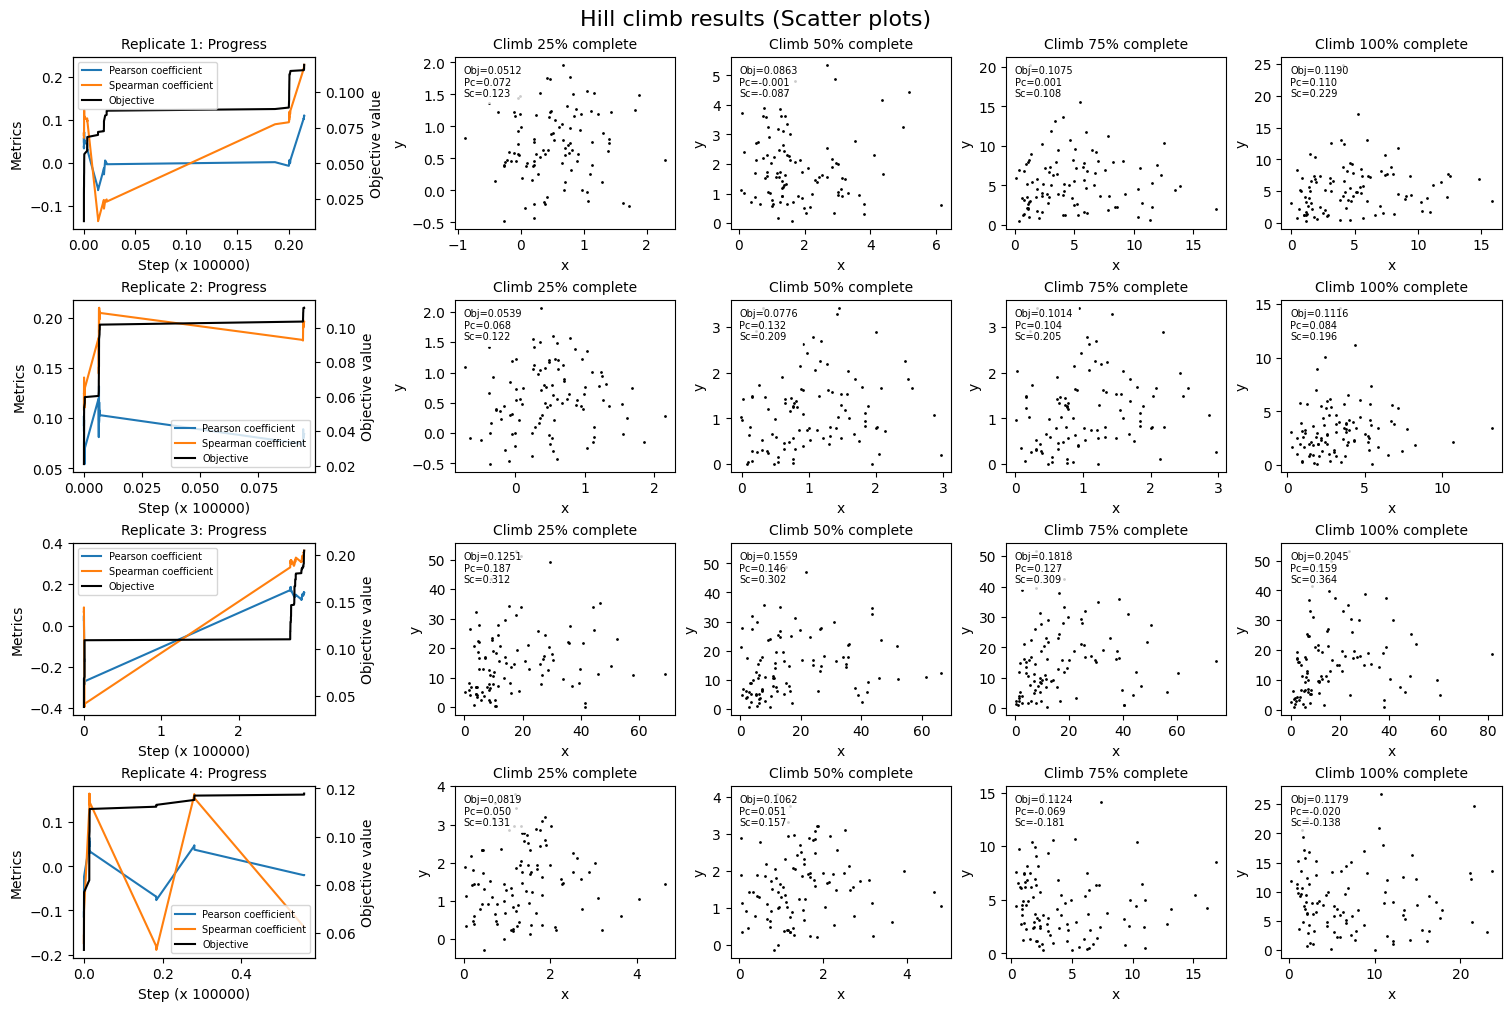

In [11]:
# Display only Pearson and Spearman correlation metrics
climber.plot_results(results, metrics=['Pearson coefficient', 'Spearman coefficient'])